#### for ALPHA in [0,1.0] in 0.5 increments , and 4 regions for moving bot dist* p no threshold on region

In [1]:
# Import necessary libraries
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
sns.set(style="whitegrid")

In [2]:
# Function to read bot data and organize it by alpha
def read_bot_data(file_path):
    data = {}
    with open(file_path, 'r') as file:
        for line in file:
            key, steps = line.strip().split(":")
            ship_size, alpha, trial = key.split("_")
            alpha = float(alpha)

            if alpha not in data:
                data[alpha] = []
            data[alpha].append(int(steps))
    return data

In [3]:
# Function to compute mean and std deviation for each alpha
def compute_statistics(data):
    stats = {}
    for alpha, steps in data.items():
        stats[alpha] = {
            "mean": np.mean(steps),
            "std_dev": np.std(steps),
            "all_steps": steps
        }
    return stats

In [4]:
# Function to plot alpha variation effects
def plot_alpha_variation(data_list, labels, colors, title):
    plt.figure(figsize=(12, 7))

    for data, label, color in zip(data_list, labels, colors):
        alphas = sorted(data.keys())
        means = [data[alpha]["mean"] for alpha in alphas]
        std_devs = [data[alpha]["std_dev"] for alpha in alphas]

        plt.plot(alphas, means, marker="o", label=label, color=color)
        plt.fill_between(alphas,
                         [mean - std for mean, std in zip(means, std_devs)],
                         [mean + std for mean, std in zip(means, std_devs)],
                         color=color, alpha=0.2)

    plt.title(title, fontsize=14)
    plt.xlabel("Alpha", fontsize=12)
    plt.ylabel("Average Steps", fontsize=12)
    plt.legend(title="Bots")
    plt.grid(True)
    plt.show()

In [5]:
# Read data from files
bot1_data = read_bot_data("sim4_0_1_n/bot1.txt")
bot2_data = read_bot_data("sim4_0_1_n/bot2.txt")
bot1_m_data = read_bot_data("sim4_0_1_n/bot1_m.txt")
bot2_m_data = read_bot_data("sim4_0_1_n/bot2_m.txt")

# Compute statistics
bot1_stats = compute_statistics(bot1_data)
bot2_stats = compute_statistics(bot2_data)
bot1_m_stats = compute_statistics(bot1_m_data)
bot2_m_stats = compute_statistics(bot2_m_data)

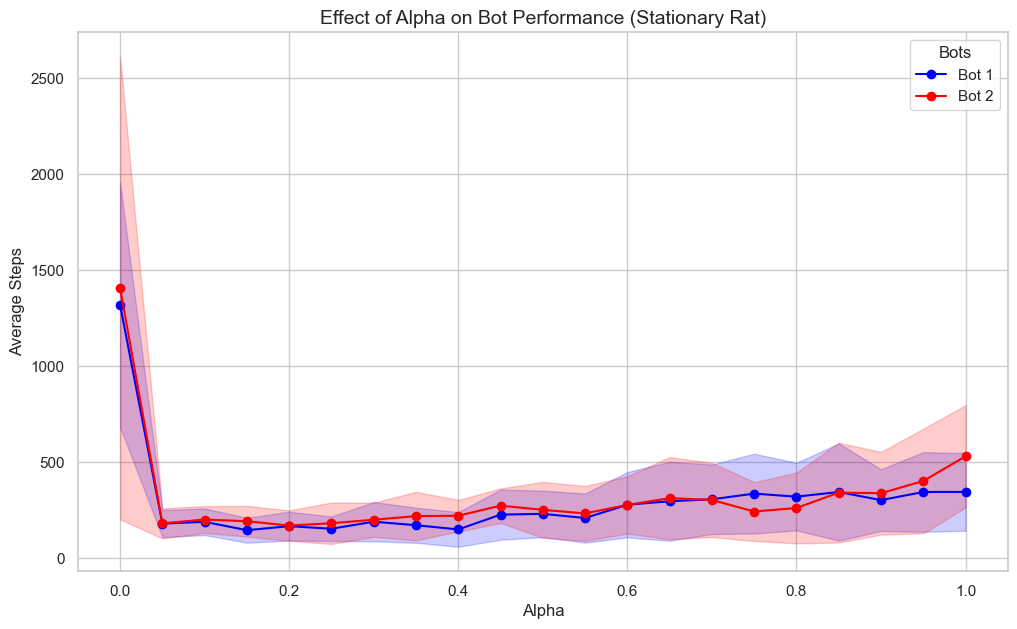

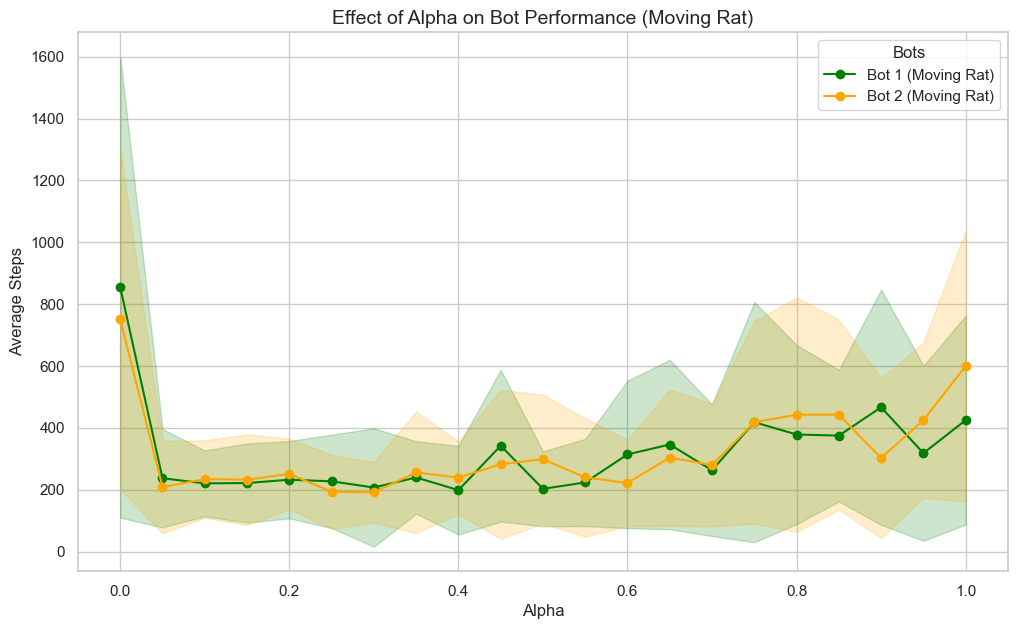

In [6]:
# Plot Alpha Variation Effects for stationary bots (Bot 1 and Bot 2)
plot_alpha_variation(
    [bot1_stats, bot2_stats],
    ["Bot 1", "Bot 2"],
    ["blue", "red"],
    "Effect of Alpha on Bot Performance (Stationary Rat)"
)

# Plot Alpha Variation Effects for moving bots (Bot 1_m and Bot 2_m)
plot_alpha_variation(
    [bot1_m_stats, bot2_m_stats],
    ["Bot 1 (Moving Rat)", "Bot 2 (Moving Rat)"],
    ["green", "orange"],
    "Effect of Alpha on Bot Performance (Moving Rat)"
)